In [8]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import test
from utils.data_utils import get_loader
from models_swin.ms_swin_transformer import *
from models_swin.swin_transformer import SwinTransformer
from models.modeling import VisionTransformer
import models_swin.ms_backup as ms_b

import matplotlib.pyplot as plt
# from visual import featuremap
import visual
import timm


In [7]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

args=test.parse_option()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


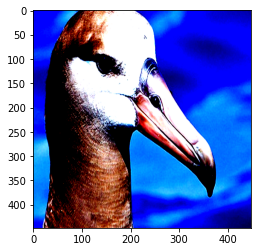

In [10]:
# data
_, test_loader = get_loader(args)
# train_list = list(enumerate(train_loader))
test_list = list(enumerate(test_loader))

# for i in range(0,3):
img, label = next(iter(test_loader))

plt.imshow(img[0,:].permute(1,2,0).detach().cpu().numpy())
# plt.imshow(test_loader.dataset.test_img[0])

In [11]:
# model
# model_ckpt = torch.load('output/sample_run_swin_t_no_checkpoint.bin')
model_ckpt = torch.load('output/ms_sample_run_swin_t_no_check_checkpoint.bin')

model=MSSwinTransformer(img_size=448, num_classes=200, num_feature_layers=1, detail_features=True)
# model=SwinTransformer(img_size=448, num_classes=200)
# model=ms_b.MSSwinTransformer(img_size=448, num_classes=200)
model.load_state_dict(model_ckpt['model'], strict=False)
model.eval()
# x=torch.randn((16,3,448,448))
x = test_list[0][1][0]
f=model.forward_features(x)
logits=model(x)
# f.shape

In [ ]:
# multi-layer feature map
layers = [2, 2, 6, 2]
lf = model.layer_features
vv=[]
for i in range(len(layers)):
    for j in range(layers[i]):
        stage = i
        block = j
        edge=6
        corr,f = visual.featuremap(lf[stage][block], num_batch=0, edge=edge, start_ch=0)
        s,v,d = np.linalg.svd(corr)
        vv.append(v)
        plt.figure()
        plt.suptitle('stage={0},block={1}'.format(stage, block), fontsize=14)
        plt.subplot(1, 2, 1)
        plt.imshow(corr)    
        plt.title("channel correlation")
        plt.subplot(1, 2, 2)
        plt.imshow(f)
        plt.title("feature map")
        
        
        # plt.colorbar()
#         plt.savefig('./visual/stage={0}_block={1}_edge{2}.png'.format(stage,block,edge),dpi=300)
        plt.show()                                    

In [ ]:
s=3
b=-1
plt.imshow(lf[s][b].mean(2).view(-1,int(112/2**s),int(112/2**s)).detach()[5,:,:])
lf[3][1].shape
plt.colorbar()

In [ ]:
## logits
# s=torch.nn.Sigmoid()(logits)
# sd=s.detach()
# plt.plot(sd[1,:])
plt.plot(logits[2,:].detach())
print(torch.argmax(logits[2,:]))

In [ ]:
tl=iter(test_loader)

In [ ]:
test_model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)

In [ ]:
# CAM

from pytorch_grad_cam import GradCAM, \
                             ScoreCAM, \
                             GradCAMPlusPlus, \
                             AblationCAM, \
                             XGradCAM, \
                             EigenCAM, \
                             EigenGradCAM

from pytorch_grad_cam import GuidedBackpropReLUModel
from pytorch_grad_cam.utils.image import show_cam_on_image, \
                                         deprocess_image, \
                                         preprocess_image



In [ ]:
plt.imshow(img[0,:].permute(1,2,0).detach().cpu().numpy())

In [ ]:
os.listdir('models_swin/')

In [ ]:
os.path.join('models_swin/', 'ms_backup.py')

In [ ]:
# confusion matrix
test_loader.dataset[32][1]
labels=[test_loader.dataset[i][1] for i in range(len(test_loader.dataset))]

In [ ]:
# confusion matrix
pred = np.load('confusion_base.npy')
conf=np.zeros((200,200))
for n, i in enumerate(labels):
    j = np.argmax(pred[n])
    conf[i][j]+=1
    
plt.figure(dpi=300)
plt.imshow((conf.T/conf.sum(1)).T)
plt.colorbar()
plt.title('confusion matrix(swin_base)')
plt.xlabel('pred')
plt.ylabel('label')
plt.savefig('confusion_matrix_base.png',dpi=300)
plt.show()

In [ ]:
conf.trace()/conf.sum()

In [ ]:
s=3
H = int(112/2**s)
plt.figure()
for b in range(2):
    plt.subplot(2,1,b+1)
    feature=lf[s][b]
    feature=feature.mean(2).squeeze()
    vv=feature.view(8,H,H)
    plt.imshow(vv[7])
    plt.colorbar()

In [ ]:
feature=lf[2][1]
feature=feature.mean(2).squeeze()
vv=feature.view(8,28,28)
plt.imshow(vv[7])
plt.colorbar()

In [ ]:
for i in range(len(vv)):
    plt.figure()
    plt.plot(vv[i])
    print(vv[i][50])

In [5]:
from aff import fusion

In [18]:
a=torch.randn((3,5,5))
print(a)
print(a.prod(0))
print(a.prod(0)**(1/3))

tensor([[[-0.8575,  0.8771, -0.4475, -1.9260, -0.0536],
         [-0.1054, -2.0634, -1.3432, -0.9708, -0.5831],
         [ 0.6183,  0.6156,  1.3839, -1.0138, -1.6934],
         [ 0.6169, -1.2540,  0.6231,  1.3413, -0.0665],
         [ 0.4537,  0.0672,  0.6152,  0.9737,  1.5877]],

        [[ 0.1877, -0.0726,  0.9181, -1.3993, -0.1569],
         [ 1.1534, -0.9384,  0.3260,  0.4129,  0.9172],
         [-0.7366, -0.9122,  0.2868, -0.5730, -0.5904],
         [-1.1469,  0.3358,  0.1498,  0.1514,  0.4370],
         [ 1.3599, -0.5992,  0.1621,  0.3121,  0.6999]],

        [[-0.1285,  0.1215,  0.6114, -0.5164,  0.8864],
         [ 1.5016,  0.0780, -0.7000, -0.3608, -0.9741],
         [-1.4275,  1.6934,  0.1261,  0.1998,  1.8123],
         [-0.5990, -0.8963,  1.7971, -0.3297,  0.7304],
         [-0.4662,  0.3959, -0.8960,  0.3101, -0.6885]]])
tensor([[ 0.0207, -0.0077, -0.2512, -1.3918,  0.0075],
        [-0.1825,  0.1510,  0.3065,  0.1446,  0.5210],
        [ 0.6501, -0.9510,  0.0501,  0.1161,

In [14]:
aff=fusion.AFF

In [19]:
tb=torch.utils.tensorboard

In [20]:
dir(tb)

['FileWriter',
 'RecordWriter',
 'SummaryWriter',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_convert_np',
 '_embedding',
 '_onnx_graph',
 '_proto_graph',
 '_pytorch_graph',
 '_utils',
 'summary',
 'writer']

In [24]:
a=torch.randn((1,3,10,10))
b=torch.nn.AdaptiveAvgPool2d(1)(a)
print(b.shape)

torch.Size([1, 3, 1, 1])


In [31]:
a=torch.nn.Parameter(torch.Tensor(1,2,3))

In [20]:
a.shape


torch.Size([8, 4, 10])

In [18]:
b.shape

torch.Size([8, 10])

In [38]:
a=torch.rand(10,6,8)

In [39]:
_,ind=a[:,:,0].max(2)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [42]:
a[:,:,0]

tensor([[0.7024, 0.1520, 0.8827, 0.8552, 0.6765, 0.3311],
        [0.8768, 0.4512, 0.2614, 0.2508, 0.3931, 0.9982],
        [0.3689, 0.9099, 0.9477, 0.8576, 0.2659, 0.5370],
        [0.6041, 0.1227, 0.2909, 0.8922, 0.1706, 0.2284],
        [0.1575, 0.8630, 0.1032, 0.8058, 0.2616, 0.2416],
        [0.0176, 0.6663, 0.2451, 0.3228, 0.6726, 0.0693],
        [0.8050, 0.2014, 0.9374, 0.2357, 0.9781, 0.7129],
        [0.3443, 0.4425, 0.2439, 0.7978, 0.4761, 0.2310],
        [0.6559, 0.4044, 0.6981, 0.8450, 0.1941, 0.8291],
        [0.7845, 0.8352, 0.9784, 0.0553, 0.1271, 0.3413]])

In [33]:
a=torch.rand(8,2)
b=torch.rand(8,3)
torch.cat((a,b),dim=1)

tensor([[0.7603, 0.0444, 0.5247, 0.6540, 0.8424],
        [0.8059, 0.7226, 0.7763, 0.6724, 0.1558],
        [0.9381, 0.9071, 0.2530, 0.2130, 0.0533],
        [0.0522, 0.5027, 0.5977, 0.5849, 0.9997],
        [0.0223, 0.0728, 0.3402, 0.7113, 0.2421],
        [0.5767, 0.9658, 0.8788, 0.8496, 0.7901],
        [0.4796, 0.1349, 0.1077, 0.6460, 0.1433],
        [0.3777, 0.0813, 0.9198, 0.4252, 0.9907]])

In [73]:
a=torch.Tensor([[1,2,3,4,5,6],[6,7,8,9,10,11],[1,2,3,4,5,6],[1,2,3,4,5,6]])

In [74]:
a.shape

torch.Size([4, 6])

In [77]:
a.view(2,2,6).view(2,12)

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  6.,  7.,  8.,  9., 10., 11.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  1.,  2.,  3.,  4.,  5.,  6.]])

In [78]:
a

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.],
        [ 6.,  7.,  8.,  9., 10., 11.],
        [ 1.,  2.,  3.,  4.,  5.,  6.],
        [ 1.,  2.,  3.,  4.,  5.,  6.]])

In [83]:
a=torch.Tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18]])

In [89]:
a.size(1)

3

In [96]:
a=torch.randn(8,3,3,4)
a.shape

torch.Size([8, 3, 3, 4])

In [106]:
a[:,:1].shape

torch.Size([8, 1, 3, 4])

In [107]:
a[:,:1].repeat(1,4,1,1).shape

torch.Size([8, 4, 3, 4])

In [108]:
a.shape

torch.Size([8, 3, 3, 4])

In [119]:
posembd=pre["Transformer/posembed_input/pos_embedding"]

In [160]:
sim = np.matmul(posembd, posembd.transpose(0,-1,-2))

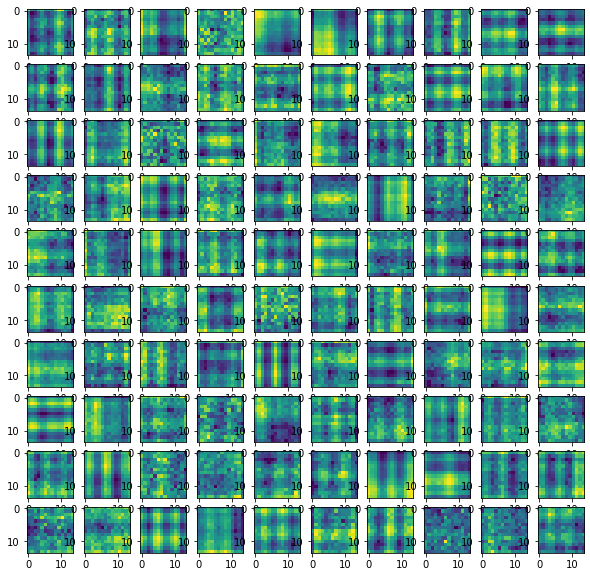

In [152]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(posembd[0,1:,i].reshape(14,14))

In [190]:
pre=np.load("/home/cyn/models/ViT-B_16.npz")
pre=np.load("/home/cyn/git/TransFG/output/vit_setup_checkpoint.bin")
posembd=pre["Transformer/posembed_input/pos_embedding"]
sim = np.matmul(posembd, posembd.transpose(0,-1,-2))

plt.figure(figsize=(20,20))

for i in range(197):
    plt.subplot(14,15,i+1)
    plt.imshow(sim[:,i,1:].reshape(14,14)/sim[:,i,1:].max())
    plt.colorbar()


KeyError: 'Transformer/posembed_input/pos_embedding is not a file in the archive'

In [320]:
B=8
C=3
L=4
a=torch.randn(B,C)
b=torch.randn(B,C)
c=F.cosine_similarity(a,b)
f=torch.randn(B,C,L)

In [327]:
def div_loss(logits_list):
    
    N = len(logits_list)
    B = logits_list[0].shape[0]
    loss_fct = F.cosine_similarity
    print(N)
    loss_list = [loss_fct(logits_list[i],logits_list[j]).abs() for i in range(N) for j in range(N) if not i==j]
    print(loss_list)
    if len(loss_list)==N*(N-1):
        return torch.stack(loss_list).sum()/N/(N-1)/B
    
div_loss([a,b])

2
[tensor([0.9647, 0.1606, 0.2398, 0.4107, 0.0903, 0.2845, 0.5486, 0.4206]), tensor([0.9647, 0.1606, 0.2398, 0.4107, 0.0903, 0.2845, 0.5486, 0.4206])]


tensor(0.3900)

In [310]:
a[:,0:2].sum(1)

tensor([-0.8213,  1.4454, -0.3585,  0.7721, -0.4686, -1.6210, -0.3534, -0.0246])

In [312]:
a

tensor([[-1.0202,  0.1989,  0.1782],
        [-0.6562,  2.1016,  1.1651],
        [ 0.3094, -0.6678,  1.8981],
        [ 1.1450, -0.3729, -1.2912],
        [-2.2720,  1.8033, -0.1705],
        [-0.3556, -1.2653,  0.5993],
        [ 0.2191, -0.5725,  0.0358],
        [ 1.3100, -1.3346,  1.1815]])

In [314]:
head=nn.Linear(10,5)

In [319]:
a=torch.ones(3,10)
head(a)

tensor([[ 0.5594,  0.8612, -0.5259,  0.1584,  0.4741],
        [ 0.5594,  0.8612, -0.5259,  0.1584,  0.4741],
        [ 0.5594,  0.8612, -0.5259,  0.1584,  0.4741]],
       grad_fn=<AddmmBackward>)

In [328]:
a.shape

torch.Size([8, 3])

In [337]:
torch.cat([f[:,i] for i in range(3)],dim=1)

tensor([[-1.4909,  0.1360,  1.1440,  1.1657, -2.0120, -0.5488, -0.6362, -2.0167,
          1.2424, -0.6688,  0.8151, -1.5385],
        [-1.0783,  0.5444,  1.3023, -1.2748, -0.0165, -0.9373, -0.7611, -0.8353,
         -0.7906, -0.7292,  0.4747,  0.3688],
        [ 0.0109,  1.4234, -0.8345, -0.1250, -0.4698, -0.4212, -0.4298, -0.3543,
          1.6692,  1.5838,  0.7409,  2.0364],
        [-1.5290,  0.6794, -0.2517,  0.9308,  0.6967, -1.0969, -0.4852,  0.2388,
         -0.2357, -0.3683,  0.1711, -0.6652],
        [ 0.8869, -1.8789,  0.2742, -0.3829,  1.3535,  1.1022,  0.4887,  0.1967,
          1.2238,  0.8417,  1.7505, -1.5379],
        [-0.3756, -0.9881,  1.5812, -1.5542,  0.9792,  0.9653,  0.5554, -2.1007,
          0.9664, -1.3940,  1.5133,  0.6318],
        [-0.0405,  0.3643,  1.6897, -0.2387,  1.5469, -0.9170,  1.5574,  1.2990,
          1.2863, -0.5510,  0.2750,  0.6753],
        [-0.5861,  0.6211, -1.0186, -0.1512, -0.0825,  1.1024,  0.9640, -1.5977,
          0.0075,  0.9370,  0.

In [338]:
f

tensor([[[-1.4909,  0.1360,  1.1440,  1.1657],
         [-2.0120, -0.5488, -0.6362, -2.0167],
         [ 1.2424, -0.6688,  0.8151, -1.5385]],

        [[-1.0783,  0.5444,  1.3023, -1.2748],
         [-0.0165, -0.9373, -0.7611, -0.8353],
         [-0.7906, -0.7292,  0.4747,  0.3688]],

        [[ 0.0109,  1.4234, -0.8345, -0.1250],
         [-0.4698, -0.4212, -0.4298, -0.3543],
         [ 1.6692,  1.5838,  0.7409,  2.0364]],

        [[-1.5290,  0.6794, -0.2517,  0.9308],
         [ 0.6967, -1.0969, -0.4852,  0.2388],
         [-0.2357, -0.3683,  0.1711, -0.6652]],

        [[ 0.8869, -1.8789,  0.2742, -0.3829],
         [ 1.3535,  1.1022,  0.4887,  0.1967],
         [ 1.2238,  0.8417,  1.7505, -1.5379]],

        [[-0.3756, -0.9881,  1.5812, -1.5542],
         [ 0.9792,  0.9653,  0.5554, -2.1007],
         [ 0.9664, -1.3940,  1.5133,  0.6318]],

        [[-0.0405,  0.3643,  1.6897, -0.2387],
         [ 1.5469, -0.9170,  1.5574,  1.2990],
         [ 1.2863, -0.5510,  0.2750,  0.6753]],


In [343]:
torch.stack([a,b],dim=1).shape

torch.Size([8, 2, 3])

In [344]:
f.shape

torch.Size([8, 3, 4])

In [346]:
f.view(8,-1).shape

torch.Size([8, 12])